In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.tools import plotting
from scipy import stats
#plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
%matplotlib inline

In [2]:
veri=pd.read_csv("datasets_33180_43520_heart.csv")


In [3]:
print('rows, columns:', veri.shape)

rows, columns: (303, 14)


In [4]:
veri.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
veri.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
classes=veri['target']
features=veri.iloc[:,:-1]

In [8]:
veri0=veri[veri['target']=="0"]
veri1=veri[veri['target']=="1"]

1    165
0    138
Name: target, dtype: int64


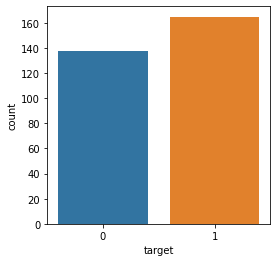

In [9]:
print (classes.value_counts())
plt.figure(figsize=(4,4))
sns.countplot(classes,label="Vaka Sayısı")
plt.show()

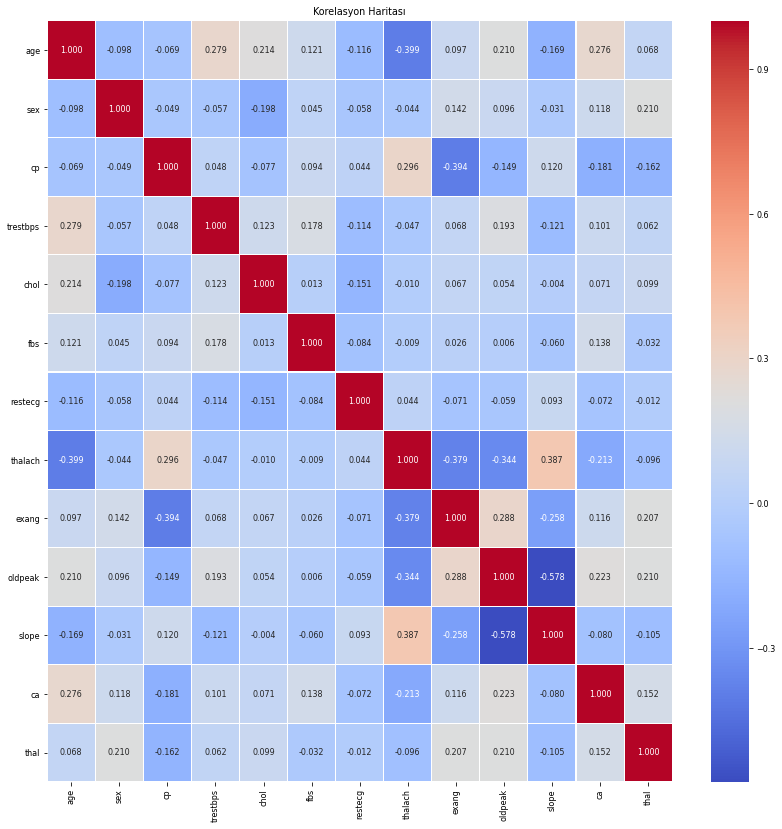

In [10]:
corr = features.corr()
plt.rcParams.update({'font.size': 8})
f,ax=plt.subplots(figsize = (14,14))
sns.heatmap(corr,annot= True,linewidths=0.1,fmt = ".3f",ax=ax, cmap= 'coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Korelasyon Haritası')
plt.savefig('graph.png')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [12]:
from sklearn.preprocessing import LabelEncoder

X = features
y = classes


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2,random_state=1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction_knn = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

In [15]:
print("KNN Sınıflandırıcı Doğruluğu: {0:.2%}".format(accuracy_score(prediction_knn, y_test)))
print("Cross validation skoru: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
cm = confusion_matrix(y_test, prediction_knn)
print("Hata Matrisi:\n",cm)
target_names = ['Sağlıklı', 'Hasta']
print(classification_report(y_test, prediction_knn, target_names=target_names))

KNN Sınıflandırıcı Doğruluğu: 57.38%
Cross validation skoru: 64.39% (+/- 10.77%)
Execution time: 0.035003 seconds 

Hata Matrisi:
 [[14 16]
 [10 21]]
              precision    recall  f1-score   support

    Sağlıklı       0.58      0.47      0.52        30
       Hasta       0.57      0.68      0.62        31

    accuracy                           0.57        61
   macro avg       0.58      0.57      0.57        61
weighted avg       0.58      0.57      0.57        61



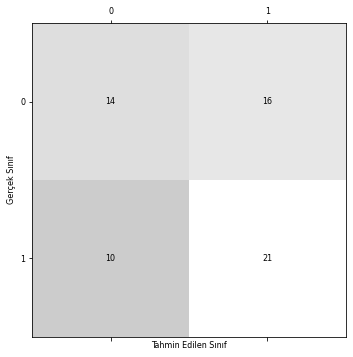

In [16]:
confmat = confusion_matrix(y_true=y_test, y_pred=prediction_knn)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat,cmap='gray',alpha=0.2)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')

plt.tight_layout()
plt.savefig('knn.png', dpi=600)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction_rf = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

In [18]:
print("Random Forest Sınıflandırıcı Doğruluğu: {0:.2%}".format(accuracy_score(prediction_rf, y_test)))
print("Cross validation skoru: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
target_names = ["1", "0"]
print(classification_report(y_test, prediction_rf, target_names=target_names))

Random Forest Sınıflandırıcı Doğruluğu: 77.05%
Cross validation skoru: 81.83% (+/- 6.47%)
Execution time: 0.66621 seconds 

              precision    recall  f1-score   support

           1       0.83      0.67      0.74        30
           0       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



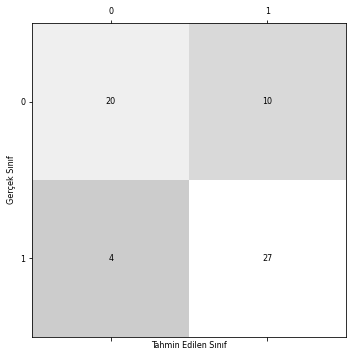

In [19]:
confmat = confusion_matrix(y_true=y_test, y_pred=prediction_rf)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat,cmap='gray',alpha=0.2)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')

plt.tight_layout()
plt.savefig('Random Forest.png', dpi=600)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction_knn_sc = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()
print("KNN Sınıflandırıcı Doğruluğu: {0:.2%}".format(accuracy_score(prediction_knn_sc, y_test)))
print("Cross validation skoru: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
cm = confusion_matrix(y_test, prediction_knn_sc)
print("Hata Matrisi:\n",cm)
target_names = ['1', '0']
print(classification_report(y_test, prediction_knn_sc, target_names=target_names))

KNN Sınıflandırıcı Doğruluğu: 75.41%
Cross validation skoru: 64.39% (+/- 10.77%)
Execution time: 0.034962 seconds 

Hata Matrisi:
 [[21  9]
 [ 6 25]]
              precision    recall  f1-score   support

           1       0.78      0.70      0.74        30
           0       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



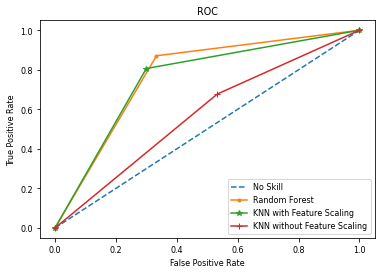

In [22]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,prediction_rf)
fpr_knn_sc, tpr_knn_sc, thresholds_knn_sc = roc_curve(y_test,prediction_knn_sc)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test,prediction_knn)
# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr_rf, tpr_rf,marker='.', label='Random Forest')
plt.plot(fpr_knn_sc, tpr_knn_sc,marker='*', label='KNN with Feature Scaling')
plt.plot(fpr_knn, tpr_knn,marker='+', label='KNN without Feature Scaling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the legend
plt.legend()
plt.show()